In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'E:\ML Dataset\LP-1 Dataset\K-Means & Hirarchical Clustering\cities_r2.csv')
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [3]:
print(df.columns)
print(df.dtypes)

Index(['name_of_city', 'state_code', 'state_name', 'dist_code',
       'population_total', 'population_male', 'population_female',
       '0-6_population_total', '0-6_population_male', '0-6_population_female',
       'literates_total', 'literates_male', 'literates_female', 'sex_ratio',
       'child_sex_ratio', 'effective_literacy_rate_total',
       'effective_literacy_rate_male', 'effective_literacy_rate_female',
       'location', 'total_graduates', 'male_graduates', 'female_graduates'],
      dtype='object')
name_of_city                       object
state_code                          int64
state_name                         object
dist_code                           int64
population_total                    int64
population_male                     int64
population_female                   int64
0-6_population_total                int64
0-6_population_male                 int64
0-6_population_female               int64
literates_total                     int64
literates_male      

In [4]:
# --------------------------- Data Preprocessing ----------------------------

# Step 3: Label Encoding for categorical columns
# Label Encoding converts categorical variables like 'state_name' and 'location' into numeric values
label_encoder = LabelEncoder()

# Encode 'state_name' and 'location' columns
df['state_name'] = label_encoder.fit_transform(df['state_name'])
df['location'] = label_encoder.fit_transform(df['location'])



In [5]:
# Step 4: Feature Scaling using StandardScaler
# Scaling the relevant columns (numerical data) that will be used for clustering
scaler = StandardScaler()

# Scale the 'effective_literacy_rate_total' along with other relevant features
scaled_df = scaler.fit_transform(df[['population_total', 'population_male', 'population_female',
                                     'literates_total', 'literates_male', 'literates_female',
                                     'effective_literacy_rate_total', 'sex_ratio', 'child_sex_ratio',
                                     'total_graduates', 'male_graduates', 'female_graduates']])

# Convert the scaled data back into a DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_df, columns=['population_total', 'population_male', 'population_female',
                                              'literates_total', 'literates_male', 'literates_female',
                                              'effective_literacy_rate_total', 'sex_ratio', 'child_sex_ratio',
                                              'total_graduates', 'male_graduates', 'female_graduates'])


In [13]:
# ------------------------ K-Means Clustering ----------------------------

# Step 5: Apply K-Means Clustering
# KMeans requires specifying the number of clusters. You can find an optimal number using the Elbow Method.

# Using the 'effective_literacy_rate_total' for clustering (you can include more features if needed)
X = scaled_df[['effective_literacy_rate_total']]

# Apply KMeans clustering with an initial assumption of 3 clusters (you can optimize this)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model and predict the clusters
df['Cluster'] = kmeans.fit_predict(X)

# Display the first few rows to see the cluster assignments
print(df.head())



  name_of_city  state_code  state_name  dist_code  population_total  \
0      Abohar            3          22          9            145238   
1    Achalpur           27          14          7            112293   
2    Adilabad           28           1          1            117388   
3   Adityapur           20          10         24            173988   
4       Adoni           28           1         21            166537   

   population_male  population_female  0-6_population_total  \
0            76840              68398                 15870   
1            58256              54037                 11810   
2            59232              58156                 13103   
3            91495              82493                 23042   
4            82743              83794                 18406   

   0-6_population_male  0-6_population_female  ...  sex_ratio  \
0                 8587                   7283  ...        890   
1                 6186                   5624  ...        928   

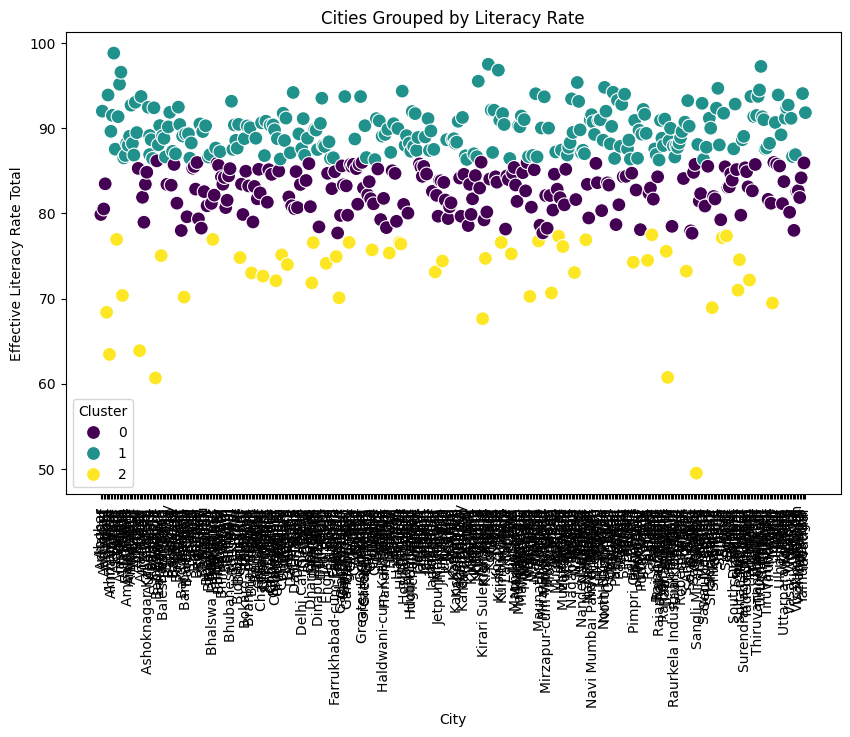

In [14]:
# Step 6: Visualizing the clusters
# Visualize the cities and their literacy rates, coloring them by their assigned cluster

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['name_of_city'], y=df['effective_literacy_rate_total'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Cities Grouped by Literacy Rate')
plt.xlabel('City')
plt.ylabel('Effective Literacy Rate Total')
plt.xticks(rotation=90)  # Rotate city names for better readability
plt.show()

In [15]:
# ------------------------- Finding Optimal Number of Clusters --------------------------

# Step 7: Elbow Method to find the optimal number of clusters
# The Elbow Method helps to determine the optimal number of clusters by plotting the inertia (within-cluster sum of squares)
# against the number of clusters.

inertia = []
for i in range(1, 11):  # Try 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


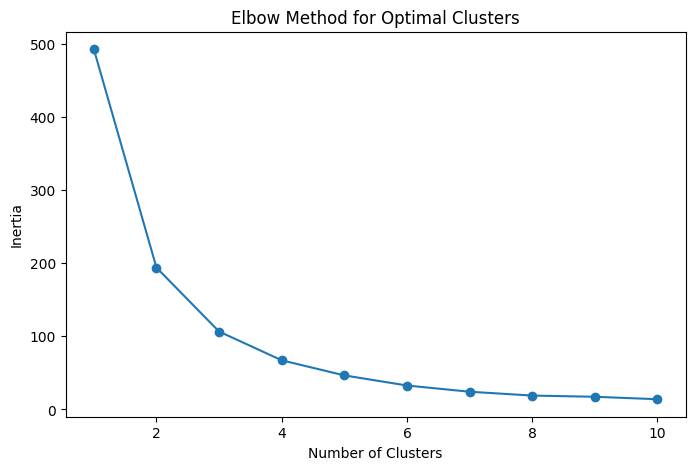

In [16]:

# Plotting the inertia values to visualize the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('Cities_r2.csv')

# Step 2: Check the first few rows to understand the dataset structure
df.head()

# --------------------------- Data Preprocessing ----------------------------

# Step 3: Label Encoding for categorical columns
# Label Encoding converts categorical variables like 'state_name' and 'location' into numeric values
label_encoder = LabelEncoder()

# Encode 'state_name' and 'location' columns
df['state_name'] = label_encoder.fit_transform(df['state_name'])
df['location'] = label_encoder.fit_transform(df['location'])

# Step 4: Feature Scaling using StandardScaler
# Scaling the relevant columns (numerical data) that will be used for clustering
scaler = StandardScaler()

# Scale the 'effective_literacy_rate_total' along with other relevant features
scaled_df = scaler.fit_transform(df[['population_total', 'population_male', 'population_female',
                                     'literates_total', 'literates_male', 'literates_female',
                                     'effective_literacy_rate_total', 'sex_ratio', 'child_sex_ratio',
                                     'total_graduates', 'male_graduates', 'female_graduates']])

# Convert the scaled data back into a DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_df, columns=['population_total', 'population_male', 'population_female',
                                              'literates_total', 'literates_male', 'literates_female',
                                              'effective_literacy_rate_total', 'sex_ratio', 'child_sex_ratio',
                                              'total_graduates', 'male_graduates', 'female_graduates'])

# ------------------------ K-Means Clustering ----------------------------

# Step 5: Apply K-Means Clustering
# KMeans requires specifying the number of clusters. You can find an optimal number using the Elbow Method.

# Using the 'effective_literacy_rate_total' for clustering (you can include more features if needed)
X = scaled_df[['effective_literacy_rate_total']]

# Apply KMeans clustering with an initial assumption of 3 clusters (you can optimize this)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model and predict the clusters
df['Cluster'] = kmeans.fit_predict(X)

# Display the first few rows to see the cluster assignments
print(df.head())

# Step 6: Visualizing the clusters
# Visualize the cities and their literacy rates, coloring them by their assigned cluster

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['name_of_city'], y=df['effective_literacy_rate_total'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Cities Grouped by Literacy Rate')
plt.xlabel('City')
plt.ylabel('Effective Literacy Rate Total')
plt.xticks(rotation=90)  # Rotate city names for better readability
plt.show()

# ------------------------- Finding Optimal Number of Clusters --------------------------

# Step 7: Elbow Method to find the optimal number of clusters
# The Elbow Method helps to determine the optimal number of clusters by plotting the inertia (within-cluster sum of squares)
# against the number of clusters.

inertia = []
for i in range(1, 11):  # Try 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the inertia values to visualize the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
